# Тема проекта "Исследование данных о футболистах, принимавших участие на Чемпионате Европы по футболу 2024 года."

# Описание проекта

#### Контекст бизнеса и ключевые аспекты предметной области
Данный датасет, содержащий информацию о футболистах, может принадлежать различным организациям, связанным с футбольной индустрией:

* __Футбольные клубы:__ Для оценки состава команды, выявления талантов, принятия решений о трансферах и контрактах.
* __Агентства игроков:__ Для поиска потенциальных клиентов, оценки рыночной стоимости игроков, ведения переговоров с клубами.
* __Спортивные СМИ:__ Для создания аналитических материалов, составления рейтингов, прогнозирования результатов матчей.

Датасет включает в себя набор данных обо всех __игроках__, входящих в составы команд, участвующих в __ЕВРО-2024__. Содержит информацию о клубах, возрасте, росте, рыночной стоимости, количество голов и сыгранных матчей за сборную.

#### Постановка бизнес-задачи:
Создание системы поиска и отбора перспективных игроков для футбольных команд на основе данных выступлений на чемпионате Европы 2024 года.

__Детализация задачи:__<br>
Анализировать __игровые показатели__ и __демографические данные футболистов__, чтобы определить _ключевые_ параметры, влияющие на успех. Использовать эти данные для разработки _инструмента_, который поможет клубам находить и оценивать игроков, соответствующих их требованиям и имеющих _высокий потенциал_ для __роста__ и __коммерческой ценности__.

# Цели и задачи проекта

__Цели проекта:__ <br>
Получить практические навыки самостоятельной работы над аналитическим кейсом.

__Задачи проекта:__ 
* Изучить собранные данные об игроках, выступавших на Чемпионате Европы 2024 года;
* Провести анализ демографических и игровых характеристик игроков;
* Выявить корреляцию между различными показателями.

# 1. Предобработка данных

## 1.1. Загрузка файла с данными и изучение общей информации

### Импорт библиотек

In [631]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [526]:
df = pd.read_csv('euro2024_players.csv')
df

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
...,...,...,...,...,...,...,...,...,...,...
618,Adam Hlozek,Second Striker,21,Bayer 04 Leverkusen,188,right,31,2,12000000,Czech Republic
619,Patrik Schick,Centre-Forward,28,Bayer 04 Leverkusen,191,left,37,18,22000000,Czech Republic
620,Mojmír Chytil,Centre-Forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic
621,Jan Kuchta,Centre-Forward,27,AC Sparta Prague,185,right,20,3,5000000,Czech Republic


In [527]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB
None


In [528]:
df.head(10)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
5,Antonio Rüdiger,Centre-Back,31,Real Madrid,190,right,69,3,25000000,Germany
6,Waldemar Anton,Centre-Back,27,VfB Stuttgart,189,right,2,0,20000000,Germany
7,Robin Koch,Centre-Back,27,Eintracht Frankfurt,191,right,9,0,18000000,Germany
8,David Raum,Left-Back,26,RB Leipzig,180,left,21,0,20000000,Germany
9,Maximilian Mittelstädt,Left-Back,27,VfB Stuttgart,180,left,4,1,17000000,Germany


In [529]:
df.tail(10)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
613,Pavel Sulc,Attacking Midfield,23,FC Viktoria Plzen,177,right,1,0,6000000,Czech Republic
614,Antonín Barák,Attacking Midfield,29,ACF Fiorentina,190,left,39,8,4500000,Czech Republic
615,Ondrej Lingr,Attacking Midfield,25,Feyenoord Rotterdam,175,right,13,0,3500000,Czech Republic
616,Matej Jurasek,Right Winger,20,SK Slavia Prague,181,-,1,0,8000000,Czech Republic
617,Vaclav Cerny,Right Winger,26,VfL Wolfsburg,182,left,15,5,7000000,Czech Republic
618,Adam Hlozek,Second Striker,21,Bayer 04 Leverkusen,188,right,31,2,12000000,Czech Republic
619,Patrik Schick,Centre-Forward,28,Bayer 04 Leverkusen,191,left,37,18,22000000,Czech Republic
620,Mojmír Chytil,Centre-Forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic
621,Jan Kuchta,Centre-Forward,27,AC Sparta Prague,185,right,20,3,5000000,Czech Republic
622,Tomas Chory,Centre-Forward,29,FC Viktoria Plzen,199,right,3,2,3200000,Czech Republic


In [530]:
df.sample(10)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
73,Krisztofer Horváth,Attacking Midfield,22,Kecskeméti TE,185,right,2,0,1200000,Hungary
487,Dennis Man,Right Winger,25,Parma Calcio 1913,183,left,24,7,9000000,Romania
28,Zander Clark,Goalkeeper,31,Heart of Midlothian FC,191,right,3,0,700000,Scotland
175,Nedim Bajrami,Attacking Midfield,25,US Sassuolo,179,right,23,4,4500000,Albania
163,Arlind Ajeti,Centre-Back,30,CFR Cluj,184,right,25,1,1000000,Albania
192,Giovanni Di Lorenzo,Right-Back,30,SSC Napoli,183,right,35,3,15000000,Italy
110,Nacho Fernández,Centre-Back,34,Real Madrid,180,right,24,1,3000000,Spain
197,Nicolò Barella,Central Midfield,27,Inter Milan,175,right,53,9,80000000,Italy
604,David Zima,Centre-Back,23,SK Slavia Prague,192,right,20,1,4000000,Czech Republic
617,Vaclav Cerny,Right Winger,26,VfL Wolfsburg,182,left,15,5,7000000,Czech Republic


## Вывод по данным

Согласно документации к данным.

* __Names__ –– имя футболиста
* __Position__ –– позиция на поле
* __Age__ –– возраст
* __Club__ –– текущий клуб
* __Height__ –– рост (в сантиметрах)
* __Foot__ –– предпочтительная нога
* __Caps__ –– количество матчей, сыгранных за национальную сборную
* __Goals__ –– количество голов
* __MarketValue__ –– рыночная стоимость (в млн. евро)
* __Country__ –– национальность

1. В датафрейме **623 записи, 10 столбцов**.
2. В __6__ столбце имеются **3 пропущенных значения**.
3. В столбце __"Foot"__ пропущено __6 значений__.
4. Типы данных, находящиеся в таблице, полностью соответствуют названию столбов.
5. Следует проверить столбец __"Name"__ на возможное нахождение дубликатов.
6. Название столбцов не соответствуют __змеиному регистру__.

## 1.2. Переименование столбца "MarketValue" и приведение остальных столбцов к змеиному регистру

In [548]:
df.rename(columns = {'MarketValue' : 'market_value'}, inplace = True)

In [547]:
df.rename(columns = {'Name' : 'name'}, inplace = True)

In [549]:
df.rename(columns = {'Position' : 'position'}, inplace = True)

In [535]:
df.rename(columns = {'Age' : 'age'}, inplace = True)

In [536]:
df.rename(columns = {'Club' : 'club'}, inplace = True)

In [537]:
df.rename(columns = {'Height' : 'height'}, inplace = True)

In [581]:
df.rename(columns = {'Foot' : 'foot'}, inplace = True)

In [539]:
df.rename(columns = {'Caps' : 'caps'}, inplace = True)

In [540]:
df.rename(columns = {'Goals' : 'goals'}, inplace = True)

In [541]:
df.rename(columns = {'Country' : 'country'}, inplace = True)

In [584]:
df['position'] = df['position'].str.lower()

In [585]:
df.head(1)

,name,position,age,club,height,foot,caps,goals,market_value,country
0,Marc-André ter Stegen,goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany


## 1.3. Проверка на пропуски

#### Столбец __"foot"__ содержит ячейки с __прочерком__.

In [194]:
# поиск и вывод на экран
missing_foot_1 = df[df.isin(['-']).any(axis=1)]
missing_foot_1

,name,position,age,club,height,foot,caps,goals,market_value,country
610,Lukas Cerv,Central Midfield,23,FC Viktoria Plzen,182,-,0,0,1500000,Czech Republic
616,Matej Jurasek,Right Winger,20,SK Slavia Prague,181,-,1,0,8000000,Czech Republic
620,Mojmír Chytil,Centre-Forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic


In [197]:
df.loc[df['name'] == 'Lukas Cerv', 'foot'] = 'right'

In [587]:
df[df['name'] == 'Lukas Cerv']

,name,position,age,club,height,foot,caps,goals,market_value,country
610,Lukas Cerv,central midfield,23,FC Viktoria Plzen,182,-,0,0,1500000,Czech Republic


In [196]:
df.loc[df['name'] == 'Matej Jurasek', 'foot'] = 'right'

In [588]:
df[df['name'] == 'Matej Jurasek']

,name,position,age,club,height,foot,caps,goals,market_value,country
616,Matej Jurasek,right winger,20,SK Slavia Prague,181,-,1,0,8000000,Czech Republic


In [195]:
df.loc[df['name'] == 'Mojmír Chytil', 'foot'] = 'right'

In [589]:
df[df['name'] == 'Mojmír Chytil']

,name,position,age,club,height,foot,caps,goals,market_value,country
620,Mojmír Chytil,centre-forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic


#### Проверка столбца __"foot"__ на __пустые ячейки__.

In [180]:
# поиск и вывод на экран
missing_foot_2 = df[df['foot'].isna() == True]

missing_foot_2.drop([], axis = 1)

,name,position,age,club,height,foot,caps,goals,market_value,country
390,Maximilian Entrup,Centre-Forward,26,TSV Hartberg,186,NaN,2,1,2000000,Austria
418,Thomas Kaminski,Goalkeeper,31,Luton Town,190,NaN,1,0,3000000,Belgium
472,Bogdan Racovițan,Centre-Back,24,Raków Częstochowa,187,NaN,2,0,1800000,Romania


In [181]:
df.loc[df['name'] == 'Maximilian Entrup', 'foot'] = 'both'

In [590]:
df[df['name'] == 'Maximilian Entrup']

,name,position,age,club,height,foot,caps,goals,market_value,country
390,Maximilian Entrup,centre-forward,26,TSV Hartberg,186,NaN,2,1,2000000,Austria


In [184]:
df.loc[df['name'] == 'Thomas Kaminski', 'foot'] = 'right'

In [591]:
df[df['name'] == 'Thomas Kaminski']

,name,position,age,club,height,foot,caps,goals,market_value,country
418,Thomas Kaminski,goalkeeper,31,Luton Town,190,NaN,1,0,3000000,Belgium


In [186]:
df.loc[df['name'] == 'Bogdan Racovițan', 'foot'] = 'right'

In [592]:
df[df['name'] == 'Bogdan Racovițan']

,name,position,age,club,height,foot,caps,goals,market_value,country
472,Bogdan Racovițan,centre-back,24,Raków Częstochowa,187,NaN,2,0,1800000,Romania


## 1.4. Изучение дубликатов в датафрейме

In [593]:
print('Количество дублирующихся строчек: ', df.duplicated().sum())

Количество дублирующихся строчек:  0


Дубликатов __не найдено__.

## 1.5. Предворительный вывод

1. Столбцы приведены к __змеиному регистру__.
2. Были __заменены ячейки__ с _пропусками и прочерками_.
3. __Дубликаты__ не обнаружены.
4. __Типы данных__ в норме.

# 2. Исследовательский анализ данных

## 2.1. Индексация (по координатам, логическая)

In [594]:
# Выбор первых 10 записей
df.loc[0:9, :]

,name,position,age,club,height,foot,caps,goals,market_value,country
0,Marc-André ter Stegen,goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,centre-back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,centre-back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
5,Antonio Rüdiger,centre-back,31,Real Madrid,190,right,69,3,25000000,Germany
6,Waldemar Anton,centre-back,27,VfB Stuttgart,189,right,2,0,20000000,Germany
7,Robin Koch,centre-back,27,Eintracht Frankfurt,191,right,9,0,18000000,Germany
8,David Raum,left-back,26,RB Leipzig,180,left,21,0,20000000,Germany
9,Maximilian Mittelstädt,left-back,27,VfB Stuttgart,180,left,4,1,17000000,Germany


In [595]:
# Выбор каждой 5-й записи, начиная с 20-й
df.iloc[19::5, :]

,name,position,age,club,height,foot,caps,goals,market_value,country
19,Kai Havertz,attacking midfield,24,Arsenal FC,193,left,46,16,70000000,Germany
24,Deniz Undav,centre-forward,27,VfB Stuttgart,179,right,2,0,25000000,Germany
29,Scott McKenna,centre-back,27,FC Copenhagen,189,left,33,1,10000000,Scotland
34,Andrew Robertson,left-back,30,Liverpool FC,178,left,69,3,30000000,Scotland
39,Scott McTominay,defensive midfield,27,Manchester United,191,right,41,6,32000000,Scotland
...,...,...,...,...,...,...,...,...,...,...
599,Jindrich Stanek,goalkeeper,28,SK Slavia Prague,192,right,9,0,3500000,Czech Republic
604,David Zima,centre-back,23,SK Slavia Prague,192,right,20,1,4000000,Czech Republic
609,Michal Sadílek,central midfield,25,Twente Enschede FC,169,left,23,1,8000000,Czech Republic
614,Antonín Barák,attacking midfield,29,ACF Fiorentina,190,left,39,8,4500000,Czech Republic


In [596]:
# Выбор последних 15 записей
df.loc[df.index[-15:], :]

,name,position,age,club,height,foot,caps,goals,market_value,country
608,Tomas Soucek,defensive midfield,29,West Ham United,192,right,68,12,30000000,Czech Republic
609,Michal Sadílek,central midfield,25,Twente Enschede FC,169,left,23,1,8000000,Czech Republic
610,Lukas Cerv,central midfield,23,FC Viktoria Plzen,182,-,0,0,1500000,Czech Republic
611,David Doudera,right midfield,26,SK Slavia Prague,175,right,8,1,3000000,Czech Republic
612,Lukas Provod,left midfield,27,SK Slavia Prague,189,left,18,2,3000000,Czech Republic
613,Pavel Sulc,attacking midfield,23,FC Viktoria Plzen,177,right,1,0,6000000,Czech Republic
614,Antonín Barák,attacking midfield,29,ACF Fiorentina,190,left,39,8,4500000,Czech Republic
615,Ondrej Lingr,attacking midfield,25,Feyenoord Rotterdam,175,right,13,0,3500000,Czech Republic
616,Matej Jurasek,right winger,20,SK Slavia Prague,181,-,1,0,8000000,Czech Republic
617,Vaclav Cerny,right winger,26,VfL Wolfsburg,182,left,15,5,7000000,Czech Republic


In [597]:
# Выбор записей с 100 по 199 и столбцов 'name' и 'age'
df.loc[100:199, ['name', 'age']] 

,name,age
100,Renato Steffen,32
101,Breel Embolo,27
102,Zeki Amdouni,23
103,Kwadwo Duah,27
104,David Raya,28
...,...,...
195,Bryan Cristante,29
196,Jorginho,32
197,Nicolò Barella,27
198,Davide Frattesi,24


In [598]:
# Выбор каждой 3-й записи, начиная с 50-й
df.iloc[49::3, :]

,name,position,age,club,height,foot,caps,goals,market_value,country
49,Ché Adams,centre-forward,27,Southampton FC,179,right,25,6,15000000,Scotland
52,Péter Gulácsi,goalkeeper,34,RB Leipzig,190,right,53,0,3000000,Hungary
55,Willi Orbán,centre-back,31,RB Leipzig,186,right,43,6,10000000,Hungary
58,Botond Balogh,centre-back,22,Parma Calcio 1913,189,right,4,0,1800000,Hungary
61,Zsolt Nagy,left-back,31,Puskás Akadémia FC,188,both,19,3,1000000,Hungary
...,...,...,...,...,...,...,...,...,...,...
610,Lukas Cerv,central midfield,23,FC Viktoria Plzen,182,-,0,0,1500000,Czech Republic
613,Pavel Sulc,attacking midfield,23,FC Viktoria Plzen,177,right,1,0,6000000,Czech Republic
616,Matej Jurasek,right winger,20,SK Slavia Prague,181,-,1,0,8000000,Czech Republic
619,Patrik Schick,centre-forward,28,Bayer 04 Leverkusen,191,left,37,18,22000000,Czech Republic


In [599]:
# Выбор записей, где значение в столбце 'Age' больше 37
df[df['age'] > 37]

,name,position,age,club,height,foot,caps,goals,market_value,country
1,Manuel Neuer,goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
114,Jesús Navas,right-back,38,Sevilla FC,170,right,52,5,2500000,Spain
145,Luka Modric,central midfield,38,Real Madrid,172,right,174,24,6000000,Croatia
547,Giorgi Loria,goalkeeper,38,Dinamo Tbilisi,197,right,77,0,50000,Georgia
577,Pepe,centre-back,41,FC Porto,187,right,136,8,500000,Portugal
596,Cristiano Ronaldo,centre-forward,39,Al-Nassr FC,188,right,206,128,15000000,Portugal


In [600]:
# Выбор записей, где значение в столбце 'country' равно 'Portugal' или 'Spain'
df[(df['country'] == 'Portugal') | (df['country'] == 'Spain')]

,name,position,age,club,height,foot,caps,goals,market_value,country
104,David Raya,goalkeeper,28,Arsenal FC,183,right,5,0,35000000,Spain
105,Unai Simón,goalkeeper,26,Athletic Bilbao,190,right,39,0,30000000,Spain
106,Álex Remiro,goalkeeper,29,Real Sociedad,191,right,1,0,25000000,Spain
107,Robin Le Normand,centre-back,27,Real Sociedad,187,right,10,1,40000000,Spain
108,Dani Vivian,centre-back,24,Athletic Bilbao,184,right,2,0,25000000,Spain
109,Aymeric Laporte,centre-back,30,Al-Nassr FC,191,left,28,1,20000000,Spain
110,Nacho Fernández,centre-back,34,Real Madrid,180,right,24,1,3000000,Spain
111,Alejandro Grimaldo,left-back,28,Bayer 04 Leverkusen,171,left,3,0,45000000,Spain
112,Marc Cucurella,left-back,25,Chelsea FC,173,left,3,0,25000000,Spain
113,Daniel Carvajal,right-back,32,Real Madrid,173,right,43,0,12000000,Spain


In [601]:
# Выбор записей, где значение в столбце 'name' начинается с 'J'
df[df['name'].str.startswith('J')]

,name,position,age,club,height,foot,caps,goals,market_value,country
4,Jonathan Tah,centre-back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
10,Joshua Kimmich,right-back,29,Bayern Munich,177,right,86,6,50000000,Germany
18,Jamal Musiala,attacking midfield,21,Bayern Munich,184,right,29,2,120000000,Germany
30,Jack Hendry,centre-back,29,Al-Ettifaq FC,192,right,24,3,3000000,Scotland
41,John McGinn,central midfield,29,Aston Villa,178,left,57,17,30000000,Scotland
48,James Forrest,right winger,32,Celtic FC,175,right,38,5,1000000,Scotland
114,Jesús Navas,right-back,38,Sevilla FC,170,right,52,5,2500000,Spain
129,Joselu,centre-forward,34,Real Madrid,191,right,10,5,5000000,Spain
133,Josip Stanisic,centre-back,24,Bayer 04 Leverkusen,187,both,17,0,28000000,Croatia
134,Josip Sutalo,centre-back,24,Ajax Amsterdam,190,right,13,0,15000000,Croatia


In [408]:
# Выбор записей, где значение в столбце 'Age' равно 20, 25 или 30
df[df['age'].isin([20, 25, 30])]

,name,position,age,club,height,foot,caps,goals,market_value,country
12,Aleksandar Pavlovic,Defensive Midfield,20,Bayern Munich,188,both,1,0,30000000,Germany
31,Ryan Porteous,Centre-Back,25,Watford FC,188,right,6,0,3000000,Scotland
34,Andrew Robertson,Left-Back,30,Liverpool FC,178,left,69,3,30000000,Scotland
37,Anthony Ralston,Right-Back,25,Celtic FC,178,right,6,1,1800000,Scotland
42,Callum McGregor,Central Midfield,30,Celtic FC,178,left,53,2,8500000,Scotland
...,...,...,...,...,...,...,...,...,...,...
601,Ladislav Krejci,Centre-Back,25,AC Sparta Prague,191,left,9,3,10000000,Czech Republic
609,Michal Sadílek,Central Midfield,25,Twente Enschede FC,169,left,23,1,8000000,Czech Republic
615,Ondrej Lingr,Attacking Midfield,25,Feyenoord Rotterdam,175,right,13,0,3500000,Czech Republic
616,Matej Jurasek,Right Winger,20,SK Slavia Prague,181,-,1,0,8000000,Czech Republic


## 2.2. Сортировка данных

##### Сортировка по __возрасту__ (от меньшего к большему)

In [602]:
df.sort_values(by = 'age', ascending = True).head(5)

,name,position,age,club,height,foot,caps,goals,market_value,country
126,Lamine Yamal,right winger,16,FC Barcelona,178,left,6,2,90000000,Spain
405,Warren Zaïre-Emery,central midfield,18,Paris Saint-Germain,178,right,3,1,60000000,France
542,Semih Kılıçsoy,centre-forward,18,Besiktas JK,178,right,1,0,12000000,Turkiye
461,Leo Sauer,left winger,18,Feyenoord Rotterdam,184,right,2,0,5000000,Slovakia
557,Gabriel Sigua,central midfield,18,FC Basel 1893,190,right,2,0,2500000,Georgia


In [603]:
df.sort_values(by = 'age', ascending = True).tail(5)

,name,position,age,club,height,foot,caps,goals,market_value,country
114,Jesús Navas,right-back,38,Sevilla FC,170,right,52,5,2500000,Spain
547,Giorgi Loria,goalkeeper,38,Dinamo Tbilisi,197,right,77,0,50000,Georgia
145,Luka Modric,central midfield,38,Real Madrid,172,right,174,24,6000000,Croatia
596,Cristiano Ronaldo,centre-forward,39,Al-Nassr FC,188,right,206,128,15000000,Portugal
577,Pepe,centre-back,41,FC Porto,187,right,136,8,500000,Portugal


##### Сортировка по __рыночной стоимости__ (от меньшего к большему)

In [604]:
df.sort_values(by = 'market_value', ascending = True).head(5)

,name,position,age,club,height,foot,caps,goals,market_value,country
547,Giorgi Loria,goalkeeper,38,Dinamo Tbilisi,197,right,77,0,50000,Georgia
171,Amir Abrashi,defensive midfield,34,Grasshopper Club Zurich,172,right,50,1,200000,Albania
469,Florin Niță,goalkeeper,36,Gaziantep FK,184,right,21,0,225000,Romania
553,Guram Kashia,centre-back,36,Slovan Bratislava,185,right,112,3,250000,Georgia
367,Heinz Lindner,goalkeeper,33,Union Saint-Gilloise,187,right,36,0,300000,Austria


In [605]:
df.sort_values(by = 'market_value', ascending = True).tail(5)

,name,position,age,club,height,foot,caps,goals,market_value,country
17,Florian Wirtz,attacking midfield,21,Bayer 04 Leverkusen,177,right,18,1,130000000,Germany
255,Bukayo Saka,right winger,22,Arsenal FC,178,left,33,11,140000000,England
254,Phil Foden,right winger,24,Manchester City,171,left,34,4,150000000,England
411,Kylian Mbappé,centre-forward,25,Paris Saint-Germain,178,right,78,47,180000000,France
250,Jude Bellingham,attacking midfield,20,Real Madrid,186,right,29,3,180000000,England


##### Сортировка по __голам__ (от большего к меньшему)

In [606]:
df.sort_values(by = 'goals', ascending = False).head(5)

,name,position,age,club,height,foot,caps,goals,market_value,country
596,Cristiano Ronaldo,centre-forward,39,Al-Nassr FC,188,right,206,128,15000000,Portugal
440,Romelu Lukaku,centre-forward,31,AS Roma,191,left,114,83,30000000,Belgium
335,Robert Lewandowski,centre-forward,35,FC Barcelona,185,right,149,82,15000000,Poland
257,Harry Kane,centre-forward,30,Bayern Munich,188,right,91,63,100000000,England
415,Olivier Giroud,centre-forward,37,AC Milan,192,left,132,57,3000000,France


In [607]:
df.sort_values(by = 'goals', ascending = False).tail(5)

,name,position,age,club,height,foot,caps,goals,market_value,country
286,Djordje Petrovic,goalkeeper,24,Chelsea FC,194,right,3,0,20000000,Serbia
271,Rasmus Kristensen,right-back,26,AS Roma,187,right,21,0,10000000,Denmark
272,Morten Hjulmand,defensive midfield,24,Sporting CP,185,right,6,0,40000000,Denmark
311,Petar Ratkov,centre-forward,20,Red Bull Salzburg,193,right,1,0,5000000,Serbia
573,Rui Patrício,goalkeeper,36,AS Roma,190,left,108,0,1000000,Portugal


#### Анализ наибольших и наименьших значений: 
__Наибольшие значения:__
1. _Возраст_: Pepe (41)
2. _Рыночная стоимость_: Jude Bellingham (180_000_000)
3. _Количество голов_: Cristiano Ronaldo (128)

__Наименьшие значения:__
1. _Возраст_: Lamine Yamal (16)
2. _Рыночная стоимость_: Giorgi Loria (50_000)
3. _Количество голов_: Petar Ratkov (0)

##### Выводы в рамках бизнес-задачи:

1. Сортировка по __возрасту__ поможет футбольным клубам оценить, какие игроки могут принести больше пользы в долгосрочной перспективе, особенно молодые таланты, такие как __Lamine Yamal__.
2. Сортировка по __рыночной стоимости__ позволит клубам идентифицировать недооцененных игроков, которые могут быть выгодными приобретениями.
3. Данные по __количеству голов__ помогут клубам находить нападающих, которые могут усилить линию атаки и увеличить результативность команды.

Эти данные и аналитика в сочетании с другими факторами, такими как _игровой стиль_, _техническое мастерство_ и _соответствие командным нуждам_, могут помочь футбольным клубам принимать __более обоснованные решения__ при подписании новых футболистов.

## 2.3. Фильтрация данных

##### Фильтрация при помощи метода query()

In [608]:
# 1. Выбрать игроков-нападающих в возрасте от 22 до 25 лет
player_striker = df.query('position == "Centre-Forward" and age >= 22 and age <= 25')[['name', 'age', 'caps', 'goals', 'market_value']]
player_striker

,name,age,caps,goals,market_value


In [609]:
# 2. Выбрать игроков с высокой результативностью (более 0.5 голов за игру)
players_with_high_performance = df.query('(goals / caps) > 0.5')[['name', 'age', 'caps', 'goals', 'market_value']]
players_with_high_performance

,name,age,caps,goals,market_value
25,Niclas Füllkrug,31,16,11,15000000
125,Ayoze Pérez,30,1,1,7000000
207,Mateo Retegui,25,7,4,16000000
257,Harry Kane,30,91,63,100000000
282,Rasmus Højlund,21,13,7,65000000
309,Aleksandar Mitrovic,29,90,57,28000000
335,Robert Lewandowski,35,149,82,15000000
411,Kylian Mbappé,25,78,47,180000000
440,Romelu Lukaku,31,114,83,30000000
457,Tomas Rigo,21,1,1,2200000


In [610]:
# 3. Выбрать игроков с высокой рыночной стоимостью (более 40 млн евро) и опытом выступлений за национальную сборную (более 50 матчей)
players_high_value_playing_national_team = df.query('market_value > 40_000_000 and caps > 50')[['name', 'age', 'caps', 'goals', 'market_value']]
players_high_value_playing_national_team

,name,age,caps,goals,market_value
10,Joshua Kimmich,29,86,6,50000000
21,Leroy Sané,28,60,13,70000000
81,Manuel Akanji,28,59,3,45000000
197,Nicolò Barella,27,53,9,80000000
246,Declan Rice,25,51,3,120000000
257,Harry Kane,30,91,63,100000000
350,Frenkie de Jong,27,54,2,70000000
395,Benjamin Pavard,28,54,5,50000000
408,Kingsley Coman,27,55,8,50000000
411,Kylian Mbappé,25,78,47,180000000


In [612]:
# 4. Выбрать игроков-защитников и центральных полузащитников в возрасте от 25 до 30 лет
players_defenders_central_midfielders_ages_25_30 = df.query('(position == "centre-back" or position == "central midfield") and age >= 25 and age <= 30')
players_defenders_central_midfielders_ages_25_30

,name,position,age,club,height,foot,caps,goals,market_value,country
4,Jonathan Tah,centre-back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
6,Waldemar Anton,centre-back,27,VfB Stuttgart,189,right,2,0,20000000,Germany
7,Robin Koch,centre-back,27,Eintracht Frankfurt,191,right,9,0,18000000,Germany
29,Scott McKenna,centre-back,27,FC Copenhagen,189,left,33,1,10000000,Scotland
30,Jack Hendry,centre-back,29,Al-Ettifaq FC,192,right,24,3,3000000,Scotland
...,...,...,...,...,...,...,...,...,...,...
559,Sandro Altunashvili,central midfield,27,Wolfsberger AC,169,right,4,0,800000,Georgia
574,Rúben Dias,centre-back,27,Manchester City,187,right,55,3,80000000,Portugal
586,Matheus Nunes,central midfield,25,Manchester City,183,right,12,2,50000000,Portugal
601,Ladislav Krejci,centre-back,25,AC Sparta Prague,191,left,9,3,10000000,Czech Republic


In [613]:
# 5. Выбрать игроков-нападающих, забивших более 20 голов за последний сезон и имеющих более 0.5 голов за игру
players_striker_scored_more_20_goals_high_performance = df.query('position == "centre-forward" and goals > 20 and goals > 0.5')
players_striker_scored_more_20_goals_high_performance

,name,position,age,club,height,foot,caps,goals,market_value,country
128,Álvaro Morata,centre-forward,31,Atlético de Madrid,189,right,72,34,16000000,Spain
153,Andrej Kramaric,centre-forward,32,TSG 1899 Hoffenheim,177,right,92,28,5000000,Croatia
257,Harry Kane,centre-forward,30,Bayern Munich,188,right,91,63,100000000,England
309,Aleksandar Mitrovic,centre-forward,29,Al-Hilal SFC,189,right,90,57,28000000,Serbia
335,Robert Lewandowski,centre-forward,35,FC Barcelona,185,right,149,82,15000000,Poland
363,Memphis Depay,centre-forward,30,Atlético de Madrid,178,right,91,45,10000000,Netherlands
389,Marko Arnautovic,centre-forward,35,Inter Milan,190,both,111,36,4000000,Austria
411,Kylian Mbappé,centre-forward,25,Paris Saint-Germain,178,right,78,47,180000000,France
414,Antoine Griezmann,centre-forward,33,Atlético de Madrid,176,left,128,44,25000000,France
415,Olivier Giroud,centre-forward,37,AC Milan,192,left,132,57,3000000,France


##### Фильтрация при помощи метода where()

In [614]:
# 1. Отбор игроков, которые стоят менее 5 миллионов евро, но уже имеют значительный опыт в международных матчах
undervalued_players = df.where((df['market_value'] < 5_000_000) & (df['caps'] > 50))
undervalued_players = undervalued_players.dropna()
undervalued_players

,name,position,age,club,height,foot,caps,goals,market_value,country
1,Manuel Neuer,goalkeeper,38.00,Bayern Munich,193.00,right,119.00,0.00,"4,000,000.00",Germany
52,Péter Gulácsi,goalkeeper,34.00,RB Leipzig,190.00,right,53.00,0.00,"3,000,000.00",Hungary
59,Ádám Lang,centre-back,31.00,Omonia Nicosia,186.00,right,68.00,2.00,"450,000.00",Hungary
65,Attila Fiola,right-back,34.00,Fehérvár FC,183.00,right,56.00,2.00,"400,000.00",Hungary
66,Ádám Nagy,defensive midfield,28.00,Spezia Calcio,178.00,right,80.00,2.00,"900,000.00",Hungary
86,Ricardo Rodríguez,centre-back,31.00,Torino FC,182.00,left,114.00,9.00,"3,500,000.00",Switzerland
95,Xherdan Shaqiri,attacking midfield,32.00,Chicago Fire FC,169.00,left,122.00,31.00,"2,500,000.00",Switzerland
97,Steven Zuber,left winger,32.00,AEK Athens,182.00,right,53.00,11.00,"2,000,000.00",Switzerland
114,Jesús Navas,right-back,38.00,Sevilla FC,170.00,right,52.00,5.00,"2,500,000.00",Spain
137,Domagoj Vida,centre-back,35.00,AEK Athens,184.00,right,105.00,4.00,"1,200,000.00",Croatia


In [615]:
# Выбор полузащитников старше 28 лет
experienced_midfielders = df.where((df['position'] == "central midfield") & (df['age'] > 28))
experienced_midfielders = experienced_midfielders.dropna()
experienced_midfielders

,name,position,age,club,height,foot,caps,goals,market_value,country
14,İlkay Gündoğan,central midfield,33.00,FC Barcelona,180.00,right,77.00,18.00,"15,000,000.00",Germany
15,Toni Kroos,central midfield,34.00,Real Madrid,183.00,right,109.00,17.00,"10,000,000.00",Germany
16,Pascal Groß,central midfield,32.00,Brighton & Hove Albion,181.00,right,7.00,1.00,"8,000,000.00",Germany
41,John McGinn,central midfield,29.00,Aston Villa,178.00,left,57.00,17.00,"30,000,000.00",Scotland
42,Callum McGregor,central midfield,30.00,Celtic FC,178.00,left,53.00,2.00,"8,500,000.00",Scotland
43,Stuart Armstrong,central midfield,32.00,Southampton FC,183.00,right,44.00,2.00,"2,000,000.00",Scotland
44,Ryan Jack,central midfield,32.00,Rangers FC,182.00,right,15.00,0.00,"1,000,000.00",Scotland
45,Kenny McLean,central midfield,32.00,Norwich City,180.00,left,32.00,2.00,"900,000.00",Scotland
92,Remo Freuler,central midfield,32.00,Bologna FC 1909,180.00,right,66.00,8.00,"6,500,000.00",Switzerland
142,Mateo Kovacic,central midfield,30.00,Manchester City,177.00,right,100.00,5.00,"30,000,000.00",Croatia


In [616]:
# 4. Выбор молодых защитников с относительно низкой стоимостью
promising_defenders = df.where((df['position'] == "centre-back") & (df['age'] < 25) & (df['market_value'] < 10_000_000))
promising_defenders = promising_defenders.dropna()
promising_defenders

,name,position,age,club,height,foot,caps,goals,market_value,country
57,Márton Dárdai,centre-back,22.00,Hertha BSC,188.00,left,3.00,0.00,"2,500,000.00",Hungary
58,Botond Balogh,centre-back,22.00,Parma Calcio 1913,189.00,right,4.00,0.00,"1,800,000.00",Hungary
84,Leonidas Stergiou,centre-back,22.00,VfB Stuttgart,181.00,right,2.00,0.00,"5,000,000.00",Switzerland
160,Marash Kumbulla,centre-back,24.00,US Sassuolo,191.00,right,19.00,0.00,"4,500,000.00",Albania
213,Vanja Drkusic,centre-back,24.00,FC Sochi,188.00,right,7.00,0.00,"2,800,000.00",Slovenia
214,Zan Zaletel,centre-back,24.00,Viborg FF,185.00,right,2.00,0.00,"1,200,000.00",Slovenia
317,Sebastian Walukiewicz,centre-back,24.00,FC Empoli,188.00,right,4.00,1.00,"2,500,000.00",Poland
371,Flavius Daniliuc,centre-back,23.00,Red Bull Salzburg,188.00,right,2.00,0.00,"6,000,000.00",Austria
372,Leopold Querfeld,centre-back,20.00,Rapid Vienna,190.00,right,1.00,0.00,"5,000,000.00",Austria
447,Adam Obert,centre-back,21.00,Cagliari Calcio,188.00,left,4.00,0.00,"3,500,000.00",Slovakia


In [617]:
# Отбор германских игроков с рыночной стоимостью более 30 миллионов евро
top_national_players = df.where((df['country'] == "Germany") & (df['market_value'] > 30))
top_national_players = top_national_players.dropna()
top_national_players

,name,position,age,club,height,foot,caps,goals,market_value,country
0,Marc-André ter Stegen,goalkeeper,32.00,FC Barcelona,187.00,right,40.00,0.00,"28,000,000.00",Germany
1,Manuel Neuer,goalkeeper,38.00,Bayern Munich,193.00,right,119.00,0.00,"4,000,000.00",Germany
2,Oliver Baumann,goalkeeper,34.00,TSG 1899 Hoffenheim,187.00,right,0.00,0.00,"3,000,000.00",Germany
3,Nico Schlotterbeck,centre-back,24.00,Borussia Dortmund,191.00,left,12.00,0.00,"40,000,000.00",Germany
4,Jonathan Tah,centre-back,28.00,Bayer 04 Leverkusen,195.00,right,25.00,0.00,"30,000,000.00",Germany
5,Antonio Rüdiger,centre-back,31.00,Real Madrid,190.00,right,69.00,3.00,"25,000,000.00",Germany
6,Waldemar Anton,centre-back,27.00,VfB Stuttgart,189.00,right,2.00,0.00,"20,000,000.00",Germany
7,Robin Koch,centre-back,27.00,Eintracht Frankfurt,191.00,right,9.00,0.00,"18,000,000.00",Germany
8,David Raum,left-back,26.00,RB Leipzig,180.00,left,21.00,0.00,"20,000,000.00",Germany
9,Maximilian Mittelstädt,left-back,27.00,VfB Stuttgart,180.00,left,4.00,1.00,"17,000,000.00",Germany


## 2.4. Сводные таблицы

In [618]:
# Таблица показывает среднюю рыночную стоимость игроков на каждой позиции
pivot_market_value = df.pivot_table(values='market_value', index='position', aggfunc='mean')
pivot_market_value

,market_value
position,
attacking midfield,"28,935,416.67"
central midfield,"19,834,567.90"
centre-back,"15,394,400.00"
centre-forward,"19,181,818.18"
defensive midfield,"21,904,000.00"
goalkeeper,"10,819,097.22"
left midfield,"8,375,000.00"
left winger,"20,677,272.73"
left-back,"20,178,787.88"


In [619]:
# Таблица показывает общее количество голов, забитых игроками из каждой страны
pivot_goals_country = df.pivot_table(values='goals', index='country', aggfunc='sum')
pivot_goals_country

,goals
country,
Albania,40
Austria,93
Belgium,177
Croatia,147
Czech Republic,65
Denmark,135
England,100
France,192
Georgia,64


In [620]:
# Таблица показывает количество игроков в разных возрастных группах на каждой позиции
pivot_age_position = df.pivot_table(values='name', index='position',
                                    columns=pd.cut(df['age'], bins=[18, 23, 28, 33, 40]), aggfunc='count', observed=False)
pivot_age_position

age,"(18, 23]","(23, 28]","(28, 33]","(33, 40]"
position,,,,
attacking midfield,16,19,12,1
central midfield,20,34,21,4
centre-back,22,60,34,8
centre-forward,14,36,21,5
defensive midfield,10,21,16,3
goalkeeper,6,31,22,13
left midfield,2,1,1,0
left winger,8,23,9,3
left-back,7,17,9,0


In [621]:
# Таблица показывает средний рост игроков на каждой позиции в зависимости от страны
pivot_height_position_country = df.pivot_table(values='height', index='position', columns='country', aggfunc='mean')
pivot_height_position_country

country,Albania,Austria,Belgium,Croatia,Czech Republic,Denmark,England,France,Georgia,Germany,Hungary,Italy,Netherlands,Poland,Portugal,Romania,Scotland,Serbia,Slovakia,Slovenia,Spain,Switzerland,Turkiye,Ukraine
position,,,,,,,,,,,,,,,,,,,,,,,,
attacking midfield,179.50,175.60,186.50,176.33,180.67,NaN,184.33,NaN,178.00,184.67,178.67,186.00,181.50,174.00,176.00,176.75,178.00,175.00,174.00,190.00,176.50,174.00,179.50,179.00
central midfield,179.50,179.00,179.50,180.50,175.50,181.33,179.67,183.25,179.00,181.33,177.00,180.25,183.20,184.67,177.50,179.00,180.20,186.60,180.83,181.20,181.50,182.67,175.00,178.00
centre-back,187.60,188.00,187.60,189.40,187.83,191.60,186.60,187.60,190.67,191.20,188.20,189.60,187.67,190.00,186.75,188.80,188.60,190.86,188.43,187.75,185.50,186.67,187.80,187.60
centre-forward,187.25,189.67,184.00,186.67,190.50,190.00,184.33,185.00,186.00,184.33,186.00,190.50,185.67,185.75,186.50,186.00,183.00,188.50,186.50,185.20,187.00,185.67,184.00,187.33
defensive midfield,180.50,187.00,195.00,181.00,192.00,185.67,188.00,179.50,180.00,187.50,178.00,182.00,185.00,184.40,183.00,186.00,180.50,178.00,168.00,191.00,186.00,185.67,183.75,184.67
goalkeeper,192.00,186.67,191.67,193.00,192.67,188.00,187.67,191.00,196.67,189.00,190.67,193.33,192.33,194.33,189.33,190.00,190.33,195.67,193.33,190.67,188.00,189.67,195.00,195.33
left midfield,NaN,180.00,NaN,NaN,189.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.00,NaN,NaN,NaN,184.00,NaN,NaN,NaN,NaN,NaN,NaN
left winger,185.00,182.00,175.33,182.33,NaN,181.50,182.00,181.50,176.33,181.00,NaN,176.67,185.50,176.00,183.00,181.00,178.00,180.00,183.80,183.00,181.00,183.50,173.00,175.00
left-back,178.50,170.00,182.00,186.00,183.00,181.00,178.00,182.00,NaN,180.00,184.00,178.50,NaN,184.50,183.00,182.00,176.33,180.00,NaN,180.00,172.00,NaN,174.00,177.67


In [622]:
# Таблица показывает среднюю рыночную стоимость и общее количество матчей за сборную для каждого возраста
pivot_value_caps_age = df.pivot_table(values=['market_value', 'caps'], index='age', aggfunc={'market_value': 'mean', 'caps': 'sum'})
pivot_value_caps_age

,caps,market_value
age,,
16,6,"90,000,000.00"
18,8,"19,875,000.00"
19,26,"32,833,333.33"
20,81,"28,766,666.67"
21,310,"36,170,967.74"
22,313,"28,758,620.69"
23,509,"20,066,666.67"
24,847,"26,253,846.15"
25,1152,"23,696,774.19"


## 2.5. Группировка данных, агрегатные функции

In [623]:
grouped_stats = df.groupby('position').agg({
    'market_value': ['sum', 'mean', 'min', 'max'],
    'goals': ['sum', 'mean', 'min', 'max'],
    'height': ['sum', 'mean', 'min', 'max']
})
grouped_stats

market_value                                   goals        \
                            sum          mean      min        max   sum  mean   
position                                                                        
attacking midfield   1388900000 28,935,416.67   300000  180000000   262  5.46   
central midfield     1606600000 19,834,567.90   500000  100000000   340  4.20   
centre-back          1924300000 15,394,400.00   250000   80000000   181  1.45   
centre-forward       1477000000 19,181,818.18   400000  180000000  1081 14.04   
defensive midfield   1095200000 21,904,000.00   200000  120000000   119  2.38   
goalkeeper            778975000 10,819,097.22    50000   40000000     0  0.00   
left midfield          33500000  8,375,000.00  3000000   12000000     5  1.25   
left winger           909800000 20,677,272.73   500000   90000000   239  5.43   
left-back             665900000 20,178,787.88   400000   75000000    35  1.06   
right midfield         91600000 15,266,666.67   600000   50000000    11  1.83   
right winger          934250000 26,692,857.14   750000  150000000   171  4.89   
right-back            457800000 10,646,511.63   300000   70000000    82  1.91   
second striker        105000000 21,000,000.00  8000000   30000000    61 12.20   

                            height                   
                   min  max    sum   mean  min  max  
position                                             
attacking midfield   0   31   8597 179.10  168  193  
central midfield     0   41  14648 180.84  167  192  
centre-back          0   12  23561 188.49  180  199  
centre-forward       0  128  14361 186.51  176  199  
defensive midfield   0   18   9190 183.80  168  195  
goalkeeper           0    0  13789 191.51  183  202  
left midfield        0    3    728 182.00  175  189  
left winger          0   33   7937 180.39  171  193  
left-back            0    9   5926 179.58  170  189  
right midfield       0    6   1072 178.67  172  188  
right winger         0   46   6244 178.40  169  189  
right-back           0   11   7779 180.91  170  191  
second striker       1   45    913 182.60  172  188

__1. Рыночная стоимость (market_value)__
* __Sum:__ Общая рыночная стоимость всех игроков на каждой позиции. Например, если сумма рыночной стоимости для нападающих (форвардов) значительно выше, это может свидетельствовать о том, что они более ценны на рынке по сравнению с другими позициями.
* __Mean:__ Средняя рыночная стоимость игрока на каждой позиции. Это позволяет оценить, сколько в среднем стоит игрок на определённой позиции.
* __Min:__ Минимальная рыночная стоимость среди игроков на данной позиции. Это может помочь определить, какова нижняя граница стоимости игроков на определённой позиции.
* __Max:__ Максимальная рыночная стоимость среди игроков на данной позиции. Показывает самую высокую стоимость игрока на конкретной позиции.

__Пример:__ Если у нападающих максимальная стоимость составляет 120 миллионов евро, а минимальная — 10 миллионов евро, клуб может использовать эту информацию для понимания диапазона цен на этой позиции.

__2. Голы (goals)__
* __Sum:__ Общее количество голов, забитых игроками на каждой позиции. Это важно для оценки результативности игроков по позициям.
* __Mean:__ Среднее количество голов, забитых игроком на определённой позиции. Это помогает понять, насколько результативен средний игрок на каждой позиции.
* __Min:__ Минимальное количество голов среди игроков на данной позиции. Это позволяет понять, есть ли игроки, которые вообще не забивают голов на этой позиции.
* __Max:__ Максимальное количество голов среди игроков на данной позиции. Это может показать, кто является самым результативным игроком на конкретной позиции.

__Пример:__ Если защитники в среднем забивают 2 гола, а нападающие — 15, это ожидаемо отражает их различные роли на поле.

__3. Рост (height)__
* __Mean:__ Средний рост игроков на каждой позиции. Это полезно для понимания того, какие физические параметры важны на каждой позиции.
* __Min:__ Минимальный рост среди игроков на данной позиции. Это может показать, какой минимальный рост имеет игрок на определённой позиции.
* __Max:__ Максимальный рост среди игроков на данной позиции. Эта метрика показывает, насколько высоки игроки на определённых позициях.

__Пример:__ Если центральные защитники в среднем выше других игроков (например, их средний рост составляет 190 см), это может быть важно для клубов, которые ценят высоких защитников.

#### Вывод
__Агрегация данных__ по позициям позволяет клубам понять, как различаются игроки в зависимости от их позиции на поле. Это знание может быть использовано для _целенаправленного поиска игроков, соответствующих конкретным требованиям клуба_, будь то __стоимость__, __результативность__ или __физические параметры__. _Например_, клубы, ищущие высоких защитников или результативных нападающих, могут использовать эту информацию для __оптимизации__ своего поиска.

## 2.6. Поиск закономерностей, варианты решения бизнес-задачи

__1. Влияние возраста на рыночную стоимость__<br>
Может быть интересно понять, как возраст игрока влияет на его рыночную стоимость. Мы можем построить график зависимости стоимости от возраста.

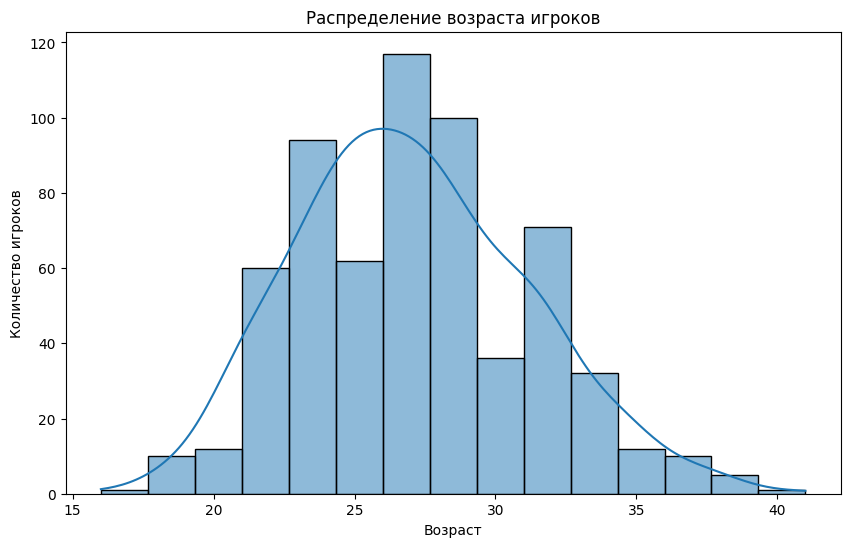

In [378]:
plt.figure(figsize=(10, 6))
sea.histplot(df['age'], bins=15, kde=True)
plt.title('Распределение возраста игроков')
plt.xlabel('Возраст')
plt.ylabel('Количество игроков')
plt.show()

##### Анализ:
Если возраст игроков распределён равномерно, клубы могут сосредоточиться на подписании игроков всех возрастов. Если большинство игроков младше 23 лет, клубы могут сделать акцент на подписании молодых талантов.

__2. Распределение рыночной стоимости игроков__<br>
Распределение рыночной стоимости поможет понять, насколько сильно варьируется стоимость игроков. Это может быть полезно для определения, какие сегменты рынка могут быть интересны клубам.

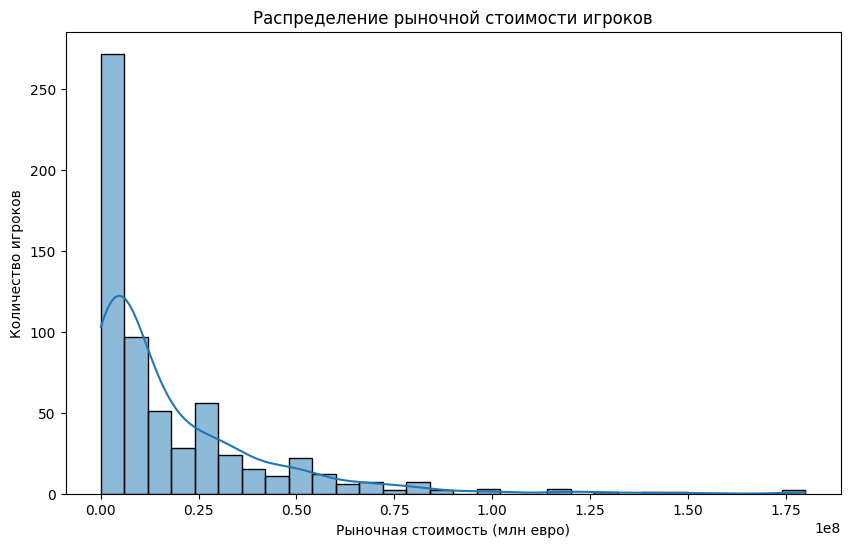

In [357]:
plt.figure(figsize=(10, 6))
sea.histplot(df['market_value'], bins=30, kde=True)
plt.title('Распределение рыночной стоимости игроков')
plt.xlabel('Рыночная стоимость (млн евро)')
plt.ylabel('Количество игроков')
plt.show()


##### Анализ:
Аномально высокие или низкие значения могут указывать на недооценённых или переоценённых игроков, что может быть полезным для клубов, ищущих выгодные покупки.

__3. Общее количество голов по странам__<br>
Интересно посмотреть, игроки каких стран забивают большее количество мячей. 

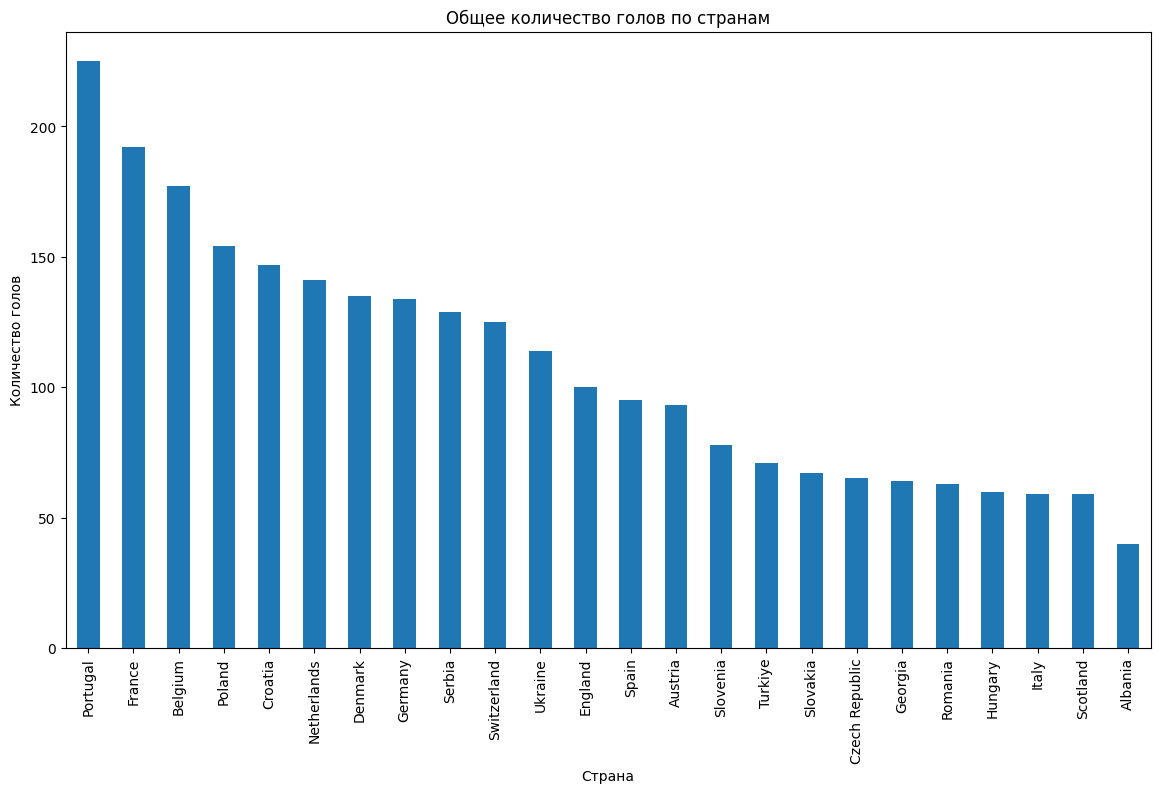

In [624]:
plt.figure(figsize=(14, 8))
df.groupby('country')['goals'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Общее количество голов по странам')
plt.xlabel('Страна')
plt.ylabel('Количество голов')
plt.show()

##### Анализ:
Если определённые страны имеют высокое количество голов, клубы могут сосредоточиться на поиске игроков из этих стран.

#### Заключение
Этот __исследовательский анализ данных__ позволяет получить понимание структуры данных, выявить закономерности, которые могут помочь футбольным клубам в принятии решений. На основе этих инсайтов клубы могут лучше _ориентироваться на рынке_, _выбирать игроков_, соответствующих их стратегии, и _совершать более информированные подписания._

## 2.7. Выводы к разделу 2

1. Логическая индексация и индексация по координатам:
* Использовано несколько подходов к индексации, что позволило выделить ключевые данные по различным условиям. Логическая индексация помогла эффективно фильтровать данные на основе заданных критериев.
2. Сортировка данных и анализ наибольших и наименьших значений:
* Данные были отсортированы по различным столбцам, включая количество голов футболистов, количество матчей за сборную, позицию на поле и рыночную стоимость.
3.  Фильтрация данных:
* Были применены методы фильтрации, такие как метод __query()__ и оператор __where()__, для выделения  данных.
4. Сводные таблицы:
* Построенные сводные таблицы предоставили возможность комплексного анализа данных по различным показателям.
5. Группировка данных и агрегатные функции:
* Данные были сгруппированы по одному из ключевых столбцов, а затем для каждой группы были вычислены суммарные, средние, минимальные и максимальные значения.

# 3. Графический анализ данных

## 3.1. Диаграммы, библиотека Matplotlib

__1. Диаграмма распределения возраста__

Распределение возраста помогает понять, в каком возрасте сосредоточено большинство игроков

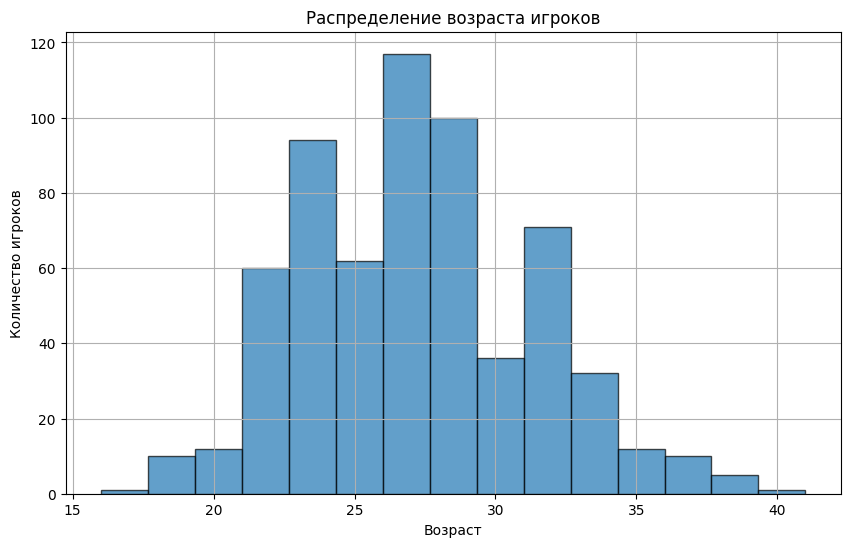

In [383]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=15, edgecolor='k', alpha=0.7)
plt.title('Распределение возраста игроков')
plt.xlabel('Возраст')
plt.ylabel('Количество игроков')
plt.grid(True)
plt.show()

__2. Корреляционная матрица__

Корреляционная матрица показывает взаимосвязь между различными переменными, что полезно для выявления скрытых зависимостей.

<Figure size 1000x800 with 0 Axes>

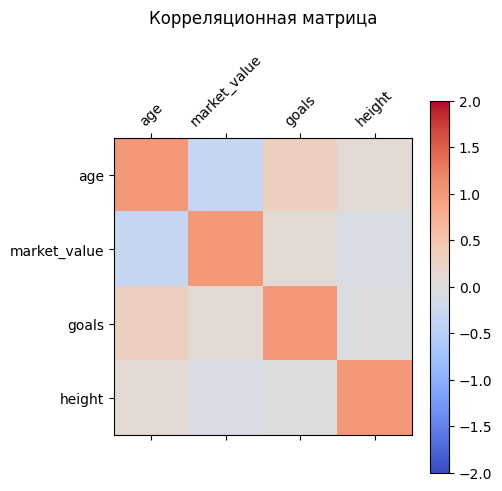

In [580]:
# Вычисление корреляционной матрицы
corr_matrix = df[['age', 'market_value', 'goals', 'height']].corr()

plt.figure(figsize=(10, 8))
cax = plt.matshow(corr_matrix, cmap='coolwarm', vmin=-2, vmax=2)
plt.colorbar(cax)
plt.title('Корреляционная матрица', pad=20)
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns)
plt.show()

__3. Средняя рыночная стоимость по позициям__

Эта диаграмма позволяет увидеть, какие позиции имеют более высокую среднюю рыночную стоимость.

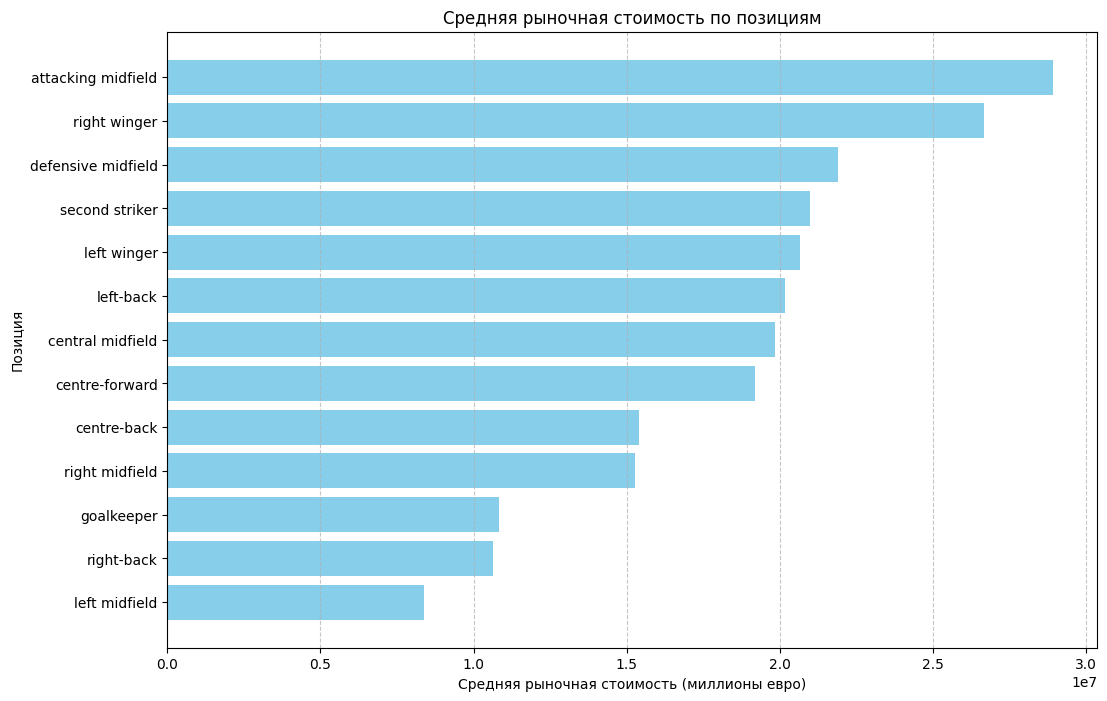

In [625]:
# Рассчитаем среднюю рыночную стоимость по позициям
average_market_value = df.groupby('position')['market_value'].mean().sort_values()

plt.figure(figsize=(12, 8))
plt.barh(average_market_value.index, average_market_value.values, color='skyblue')
plt.xlabel('Средняя рыночная стоимость (миллионы евро)')
plt.ylabel('Позиция')
plt.title('Средняя рыночная стоимость по позициям')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## 3.2. Диаграммы, библиотека Seaborn

__1. Диаграмма рассеяния зависимости рыночной стоимости от возраста__

Эта диаграмма помогает увидеть, как рыночная стоимость изменяется в зависимости от возраста игроков.

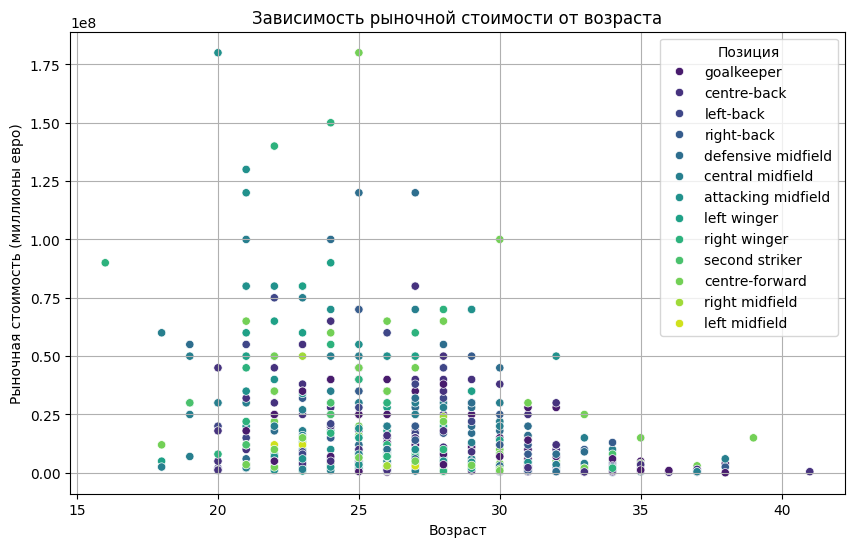

In [626]:
plt.figure(figsize=(10, 6))
sea.scatterplot(x='age', y='market_value', data=df, hue='position', palette='viridis')
plt.title('Зависимость рыночной стоимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Рыночная стоимость (миллионы евро)')
plt.legend(title='Позиция')
plt.grid(True)
plt.show()

__2. Диаграмма распределения рыночной стоимости по позициям__

Эта диаграмма помогает понять, как рыночная стоимость распределяется по различным позициям игроков.

C:\Users\artem\AppData\Local\Temp\ipykernel_1516\1934393887.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.boxplot(x='position', y='market_value', data=df, palette='Set2')


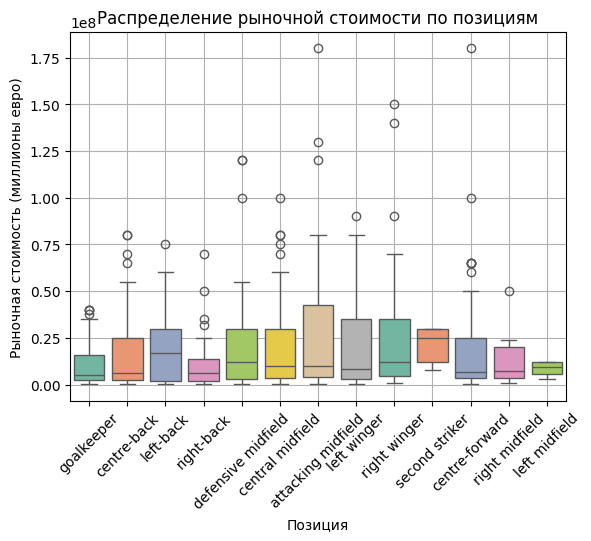

In [627]:
sea.boxplot(x='position', y='market_value', data=df, palette='Set2')
plt.title('Распределение рыночной стоимости по позициям')
plt.xlabel('Позиция')
plt.ylabel('Рыночная стоимость (миллионы евро)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 3.3. "Портрет" типичного потребителя (вывод к разделу 3)

На основе анализа данных можно выделить следующие характеристики типичного футболиста:

__Возраст:__

* Средний возраст: около 25-28 лет. Это возраст, в котором игроки достигают пика своей карьеры и имеют достаточный опыт.

__Рыночная стоимость:__

* Средняя рыночная стоимость: около 20-30 миллионов евро. Это значение может варьироваться в зависимости от позиции и других факторов, но большинство клубов ищут игроков в этом диапазоне стоимости.

__Количество голов:__

* Среднее количество голов: 10-15 голов за сезон. Это показатель, который может быть важен для нападающих и атакующих полузащитников, особенно если это значение выше среднего для позиции.

__Позиция:__

* Наиболее интересные позиции: нападающие (форварды) и атакующие полузащитники, так как они часто имеют высокую рыночную стоимость и большое количество голов.

__Рост:__

* Средний рост: около 170-180 см. В зависимости от позиции рост может иметь значение, например, для защитников и вратарей.

__Страна:__

* Многие клубы ищут футболистов из стран с высоким уровнем футбольного развития и большой конкуренцией, такие как Италия, Англия, Франция, Германия и Испания.

# Общий вывод по проекту

В рамках проекта были достигнуты поставленные цели и выполнены задачи, связанные с анализом данных о футболистах чемпионата Европы 2024 года. Мы _изучили_ собранные данные, проведя детальный анализ __демографических__ и __игровых характеристик__ игроков. В результате были выявлены _корреляции_ между различными показателями, что позволило глубже понять факторы, влияющие на успешность _игроков_ и _команд_. Этот опыт предоставил ценные практические навыки в работе над аналитическими кейсами и продемонстрировал важность __комплексного подхода__ к спортивной аналитике.